<a href="https://colab.research.google.com/github/ashraful005/DS_ML_Bootcamp/blob/master/notebooke0ca5a2fcd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Install packages**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!pip install torchmetrics
!pip install torchinfo

# **2. Import libraries**

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Preprocessing
import cv2
from sklearn.model_selection import train_test_split as tts

# Torch
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from torchmetrics.classification import MulticlassAccuracy
from torchvision.models import resnet50, ResNet50_Weights

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# os
import os

# Path
from pathlib import Path

# tqdm
from tqdm.auto import tqdm

# typing
from typing import Dict, List

# Counter
from collections import Counter

# random
import random

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
files.upload()

Saving SB-Fish-Disease.csv to SB-Fish-Disease.csv


{'SB-Fish-Disease.csv': b'Folder Name,Image Filename,Image Path\r\nBacterial diseases - Aeromoniasis,Bacterial diseases - Aeromoniasis (1).jpeg,SB-FishDisease\\Bacterial diseases - Aeromoniasis\\Bacterial diseases - Aeromoniasis (1).jpeg\r\nBacterial diseases - Aeromoniasis,Bacterial diseases - Aeromoniasis (1).jpg,SB-FishDisease\\Bacterial diseases - Aeromoniasis\\Bacterial diseases - Aeromoniasis (1).jpg\r\nBacterial diseases - Aeromoniasis,Bacterial diseases - Aeromoniasis (1).png,SB-FishDisease\\Bacterial diseases - Aeromoniasis\\Bacterial diseases - Aeromoniasis (1).png\r\nBacterial diseases - Aeromoniasis,Bacterial diseases - Aeromoniasis (10).jpg,SB-FishDisease\\Bacterial diseases - Aeromoniasis\\Bacterial diseases - Aeromoniasis (10).jpg\r\nBacterial diseases - Aeromoniasis,Bacterial diseases - Aeromoniasis (11).jpg,SB-FishDisease\\Bacterial diseases - Aeromoniasis\\Bacterial diseases - Aeromoniasis (11).jpg\r\nBacterial diseases - Aeromoniasis,Bacterial diseases - Aeromoniasis

In [ ]:
!pip install kaggle

In [11]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [25]:
!cp kaggle.json ~/.kaggle

In [26]:
!chmod 600 ~/.kaggle/kaggle.json

In [17]:
pip install --upgrade kaggle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.3-py3-none-any.whl size=111917 sha256=48b80aea5033535648898a15f379b5336f0b2b07e105a3f7315c6a8073d9bfca
  Stored in directory: /root/.cache/pip/wheels/84/d2/34/6916f5c78356670068af8c9c17d4fac1a38fbfb71777ec12fc
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [27]:
!chmod 600 ~/.kaggle/kaggle.json

In [28]:
!kaggle datasets list

ref                                                         title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
hummaamqaasim/jobs-in-data                                  Jobs and Salaries in Data Science                76KB  2023-12-25 20:03:32          10730        206  1.0              
nelgiriyewithana/apple-quality                              Apple Quality                                   170KB  2024-01-11 14:31:07           4128        102  1.0              
joebeachcapital/57651-spotify-songs                         57,650 Spotify Songs                             21MB  2024-01-23 06:48:36            987         33  1.0              
sahilwagh/gold-stock-prices                                 Gold Stock Prices                       

In [30]:
!kaggle datasets download 'subirbiswas19/freshwater-fish-disease-aquaculture-in-south-asia'

 76% 8.00M/10.6M [00:01<00:00, 13.1MB/s]
100% 10.6M/10.6M [00:01<00:00, 9.81MB/s]


In [31]:
!unzip freshwater-fish-disease-aquaculture-in-south-asia.zip

Archive:  freshwater-fish-disease-aquaculture-in-south-asia.zip
  inflating: SB-Fish-Disease.csv     
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).jpeg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).png  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (10).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (11).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (12).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (13).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (15).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (16).jpg  
  inflating: SB-Fi

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('SB-Fish-Disease.csv')

In [ ]:
df

Folder Name  \
0    Bacterial diseases - Aeromoniasis   
1    Bacterial diseases - Aeromoniasis   
2    Bacterial diseases - Aeromoniasis   
3    Bacterial diseases - Aeromoniasis   
4    Bacterial diseases - Aeromoniasis   
..                                 ...   
513  Viral diseases White tail disease   
514  Viral diseases White tail disease   
515  Viral diseases White tail disease   
516  Viral diseases White tail disease   
517  Viral diseases White tail disease   

                                 Image Filename  \
0    Bacterial diseases - Aeromoniasis (1).jpeg   
1     Bacterial diseases - Aeromoniasis (1).jpg   
2     Bacterial diseases - Aeromoniasis (1).png   
3    Bacterial diseases - Aeromoniasis (10).jpg   
4    Bacterial diseases - Aeromoniasis (11).jpg   
..                                          ...   
513   Viral diseases White tail disease (7).jpg   
514  Viral diseases White tail disease (8).jpeg   
515   Viral diseases White tail disease (8).jpg   
516  Viral diseases White tail disease (9).jpeg   
517   Viral diseases White tail disease (9).jpg   

                                            Image Path  
0    SB-FishDisease\Bacterial diseases - Aeromonias...  
1    SB-FishDisease\Bacterial diseases - Aeromonias...  
2    SB-FishDisease\Bacterial diseases - Aeromonias...  
3    SB-FishDisease\Bacterial diseases - Aeromonias...  
4    SB-FishDisease\Bacterial diseases - Aeromonias...  
..                                                 ...  
513  SB-FishDisease\Viral diseases White tail disea...  
514  SB-FishDisease\Viral diseases White tail disea...  
515  SB-FishDisease\Viral diseases White tail disea...  
516  SB-FishDisease\Viral diseases White tail disea...  
517  SB-FishDisease\Viral diseases White tail disea...  

[518 rows x 3 columns]

# **3. Load data and EDA**

In [34]:
# Let's see how many images we have.
from pathlib import Path
IMAGE_PATH = Path("/content/SB-FishDisease/SB-FishDisease")

image_path_list_jpg = list(IMAGE_PATH.glob("*/*.jpg"))
image_path_list_jpeg = list(IMAGE_PATH.glob("*/*.jpeg"))
image_path_list_png = list(IMAGE_PATH.glob("*/*.png"))
image_path_list_JPG = list(IMAGE_PATH.glob("*/*.JPG"))
image_path_list_webp = list(IMAGE_PATH.glob("*/*.webp"))

TOTAL_IMAGE_PATH_LIST = image_path_list_jpg + image_path_list_jpeg + image_path_list_png\
                        + image_path_list_JPG + image_path_list_webp

print(f'Total Images = {len(TOTAL_IMAGE_PATH_LIST)}')

Total Images = 460


In [36]:
# Let's visualize how many classes we have.
import os
classes = sorted(os.listdir(IMAGE_PATH))
classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

In [38]:
# Let's see how many images per class we have.
from collections import Counter
class_count = []
for i in TOTAL_IMAGE_PATH_LIST:
    class_count.append(i.parent.stem)

Counter(class_count)

Counter({'Viral diseases White tail disease': 44,
         'Bacterial diseases - Aeromoniasis': 49,
         'Parasitic diseases': 38,
         'Bacterial Red disease': 48,
         'Healthy Fish': 177,
         'Bacterial gill disease': 58,
         'Fungal diseases Saprolegniasis': 46})

In [42]:
# Let's visualize 5 images for each class.
import matplotlib.pyplot as plt
import random
import cv2

fig,ax = plt.subplots(nrows = 7, ncols = 5, figsize = (12,20))
p = 0
for c in classes:

    a = random.choices(list(Path(os.path.join(IMAGE_PATH, c)).glob("*.jpg")), k = 5)

    for i,j in enumerate(a):
        img_BGR = cv2.imread(str(j))
        img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
        ax[p,i].imshow(img_RGB)
        ax[p,i].set_title(f'Class: {j.parent.stem}\nShape: {img_RGB.shape}', fontsize = 6)
        ax[p,i].axis('off')
    p += 1

fig.tight_layout()
fig.show()

**We see that the images have different sizes, so we will proceed to see how the width and height of the images are distributed.**

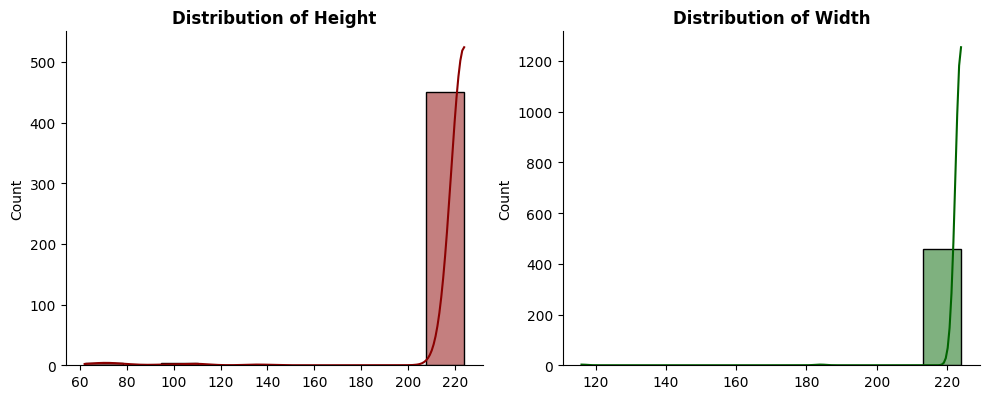

In [44]:
import seaborn as sns

seq_height = []
seq_width = []

for i in TOTAL_IMAGE_PATH_LIST:
    img_BGR = cv2.imread(str(i))
    img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
    seq_height.append(img_RGB.shape[0])
    seq_width.append(img_RGB.shape[1])

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4.1))
ax = ax.flat

sns.histplot(seq_height, kde = True, color = 'darkred', ax = ax[0])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_title('Distribution of Height', fontweight = 'bold', color = 'black')

sns.histplot(seq_width, kde = True, color = 'darkgreen', ax = ax[1])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_title('Distribution of Width', fontweight = 'bold', color = 'black')

fig.tight_layout()
fig.show()

In [46]:
import pandas as pd
df_height_width = pd.DataFrame({'height':seq_height, 'width':seq_width})

df_height_width.describe().T

count        mean        std    min    25%    50%    75%    max
height  460.0  221.345652  18.914556   62.0  224.0  224.0  224.0  224.0
width   460.0  223.678261   5.365991  116.0  224.0  224.0  224.0  224.0

# **4. Preprocessing**

In [47]:
# Let's create our pd.DataFrame to store the path of the images and their respective label.
img_path_and_label = {'img_path':[],
                      'label':[]}

for img_pth in TOTAL_IMAGE_PATH_LIST:
    img_path_and_label['img_path'].append(img_pth)
    img_path_and_label['label'].append(img_pth.parent.stem)

df_path_and_label = pd.DataFrame(img_path_and_label)
df_path_and_label.head()

img_path  \
0  /content/SB-FishDisease/SB-FishDisease/Viral d...   
1  /content/SB-FishDisease/SB-FishDisease/Viral d...   
2  /content/SB-FishDisease/SB-FishDisease/Viral d...   
3  /content/SB-FishDisease/SB-FishDisease/Viral d...   
4  /content/SB-FishDisease/SB-FishDisease/Viral d...   

                               label  
0  Viral diseases White tail disease  
1  Viral diseases White tail disease  
2  Viral diseases White tail disease  
3  Viral diseases White tail disease  
4  Viral diseases White tail disease

In [50]:
# Now we are going to separate the paths of the images and their respective label.
from sklearn.model_selection import train_test_split
X = df_path_and_label.drop('label', axis = 1)
y = df_path_and_label['label']

# Then, let's split into training and test set.
# But first we define the random seed for reproducibility.
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

In [ ]:
print('Total Images of training set:')
print(Counter(y_train))
print('')

print('Total Images of test set:')
print(Counter(y_test))

In [51]:
classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

In [54]:
# Now we have to convert our labels to number, where:
# Bacterial Red disease = 0
# Bacterial diseases - Aeromoniasis = 1
# Bacterial gill disease = 2
# Fungal diseases Saprolegniasis = 3
# Healthy Fish = 4
# Parasitic diseases = 5
# Viral diseases White tail disease = 6
import numpy as np
import torch
label_map = dict(zip(classes, range(0,7)))

y_train_array = np.array(y_train.map(label_map))
y_train_torch = torch.from_numpy(y_train_array)

y_test_array = np.array(y_test.map(label_map))
y_test_torch = torch.from_numpy(y_test_array)
y_test_torch

tensor([4, 1, 2, 5, 4, 4, 1, 5, 6, 3, 4, 3, 4, 4, 0, 1, 4, 3, 6, 5, 0, 4, 3, 0,
        2, 2, 1, 5, 4, 6, 2, 6, 4, 1, 1, 4, 3, 2, 4, 4, 3, 1, 4, 4, 0, 0, 4, 4,
        5, 0, 2, 4, 2, 2, 4, 1, 6, 4, 4, 1, 4, 4, 3, 5, 0, 6, 3, 4, 6, 4, 4, 4,
        4, 2, 4, 2, 4, 5, 4, 3, 4, 1, 6, 0, 4, 6, 2, 4, 4, 5, 0, 2])

In [57]:
# We define the transformations for our data set.
import torchvision
from torchvision.models import ResNet50_Weights
weights = ResNet50_Weights.DEFAULT
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [59]:
# We apply the transformations to our data sets.
from PIL import Image
images_train = [None] * len(X_train)

for i, (_,img_path_train) in enumerate(X_train.iterrows()):
    img_train = Image.open(img_path_train[0]).convert('RGB')
    images_train[i] = auto_transforms(img_train)

images_test = [None] * len(X_test)

for i, (_, img_path_test) in enumerate(X_test.iterrows()):
    img_test = Image.open(img_path_test[0]).convert('RGB')
    images_test[i] = auto_transforms(img_test)

In [60]:
# We will then convert our lists of tensors into a single tensor.
X_train_torch = torch.stack(images_train)
X_test_torch = torch.stack(images_test)

In [61]:
# Let's visualize some randomly selected transformed images.
indices = torch.randperm(10).numpy()

fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (10,4))
ax = ax.flat

for i,j in enumerate(indices):
    IMG = X_train_torch[j].permute(1,2,0).numpy()
    ax[i].imshow(IMG)
    ax[i].set_title(f'Shape: {IMG.shape}', fontsize = 9)
    ax[i].axis('off')

fig.tight_layout()
fig.show()

**Now we have to convert our tensors into Datase's and then convert it into DataLoader's.**

In [63]:
# First of all, we convert to Dataset but for this we have to create a Dataset class.
from torch.utils.data import Dataset
class CustomDataset(Dataset):
    def __init__(self, data, target):
        self.data = data
        self.target = target

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.target[idx]

        return x,y

In [64]:
# Now we convert to Dataset.
train_dataset = CustomDataset(X_train_torch, y_train_torch)
test_dataset = CustomDataset(X_test_torch, y_test_torch)

In [66]:
# Then we convert to DataLoader.
from torch.utils.data import DataLoader
BATCH_SIZE = 4
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset = train_dataset,
                              batch_size = BATCH_SIZE,
                              shuffle = True,
                              num_workers = NUM_WORKERS)

test_dataloader = DataLoader(dataset = test_dataset,
                             batch_size = BATCH_SIZE,
                             shuffle = False,
                             num_workers = NUM_WORKERS)

In [67]:
# Let's visualize a batch.
images_batch, labels_batch = next(iter(train_dataloader))

images_batch.shape, labels_batch.shape

(torch.Size([4, 3, 224, 224]), torch.Size([4]))

# **5. Model**

In [68]:
# GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [73]:
# We define the model to use.
from torchvision import models
model = models.resnet50(weights = weights)


In [84]:
import torchsummary

# Now we visualize the architecture of the model.
torchsummary.summary(model, input_size=(3, 224, 224), device="cuda")


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [85]:
# Now we freeze the parameters of the extractor layers.
for param in model.parameters():
    param.requires_grad = False

In [87]:
# We go back to visualize how it looked after freezing the parameters.
# Now we visualize the architecture of the model.
summary(model, input_size=(3, 224, 224), device="cuda")



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [88]:
# Let's visualize the last layer, which we will modify for our binary classification purpose.
model.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [90]:
# We modify the last layer.
import torch.nn as nn
output_shape = len(classes)

model.fc = nn.Linear(in_features = 2048, out_features = output_shape, bias = True)

In [92]:
# We visualize our model again.
summary(model, input_size=(3, 224, 224), device="cuda")


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [93]:
# Now let's visualize one step forward.

pred_logit = model(images_batch.to(device))
pred_logit

tensor([[-0.0334,  0.0195, -0.0101, -0.0545,  0.1991,  0.0861,  0.0525],
        [ 0.0302,  0.2108, -0.0768,  0.0529,  0.0969,  0.0385,  0.0292],
        [ 0.0315,  0.0138,  0.0956,  0.0562,  0.0537,  0.0645, -0.0160],
        [ 0.0512,  0.0534,  0.1244,  0.0955,  0.0533, -0.0173, -0.0420]],
       grad_fn=<AddmmBackward0>)

In [96]:
# Let's define our loss function and the optimizer.
import torch
import torch.nn as nn
from torch.optim import AdamW
loss_fn = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=0.01, weight_decay=0.1)

**We are going to define 3 functions to execute the training**:

- train_step
- checkpoint
- test_step
- train

In [114]:
from sklearn.metrics import accuracy_score

def train_step(model, dataloader, loss_fn, optimizer):
    model.train()

    train_loss = 0.
    y_true = []
    y_pred = []

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        # Append true and predicted labels for accuracy calculation
        y_true.extend(y.cpu().numpy())
        y_pred.extend(outputs.argmax(dim=1).cpu().numpy())

    accuracy = accuracy_score(y_true, y_pred)
    train_loss /= len(dataloader)

    return train_loss, accuracy


In [115]:
def save_checkpoint(filename, model, loss, epoch, optimizer):
    state = {'filename':filename,
             'model':model.state_dict(),
             'loss':loss,
             'epoch':epoch,
             'optimizer':optimizer.state_dict()}

    torch.save(state, filename)

In [119]:
from sklearn.metrics import accuracy_score

def test_step(model, dataloader, loss_fn):
    model.eval()

    test_loss = 0.
    y_true = []
    y_pred = []

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            outputs = model(X)
            loss = loss_fn(outputs, y)
            test_loss += loss.item()

            # Append true and predicted labels for accuracy calculation
            y_true.extend(y.cpu().numpy())
            y_pred.extend(outputs.argmax(dim=1).cpu().numpy())

    accuracy = accuracy_score(y_true, y_pred)
    test_loss /= len(dataloader)

    return test_loss, accuracy


In [120]:
def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          loss_fn:torch.nn.Module,
          optimizer:torch.optim.Optimizer,
          epochs:int):

    results = {'train_loss':[],
               'train_accuracy':[],
               'test_loss':[],
               'test_accuracy':[]}

    best_test_loss = float('inf')

    for epoch in tqdm(range(epochs)):
        train_loss, train_accuracy = train_step(model = model,
                                        dataloader = train_dataloader,
                                        loss_fn = loss_fn,
                                        optimizer = optimizer)


        test_loss, test_accuracy = test_step(model = model,
                                     dataloader = test_dataloader,
                                     loss_fn = loss_fn)

        if test_loss < best_test_loss:
            best_test_loss = test_loss

            file_name = 'best_model.pt'

            save_checkpoint(file_name, model, best_test_loss, epoch, optimizer)

        print(f'Epoch: {epoch + 1} | ',
              f'Train Loss: {train_loss:.4f} | ',
              f'Train Accuracy: {train_accuracy:.4f} | ',
              f'Test Loss: {test_loss:.4f} | ',
              f'Test Accuracy: {test_accuracy:.4f}')

        results['train_loss'].append(train_loss)
        results['train_accuracy'].append(train_accuracy)
        results['test_loss'].append(test_loss)
        results['test_accuracy'].append(test_accuracy)

    return results

In [ ]:
# Training !!
!pip install scikit-learn
from tqdm import tqdm
from sklearn.metrics import accuracy_score
# Training !!

torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

EPOCHS = 100

MODEL_RESULTS = train(model.to(device),
                      train_dataloader,
                      test_dataloader,
                      loss_fn,
                      optimizer,
                      EPOCHS)

  1%|          | 1/100 [01:58<3:15:37, 118.56s/it]

Epoch: 1 |  Train Loss: 0.4765 |  Train Accuracy: 0.8560 |  Test Loss: 1.0565 |  Test Accuracy: 0.7174


  2%|▏         | 2/100 [03:59<3:16:03, 120.04s/it]

Epoch: 2 |  Train Loss: 1.0071 |  Train Accuracy: 0.6875 |  Test Loss: 1.0037 |  Test Accuracy: 0.7174


  3%|▎         | 3/100 [06:16<3:26:33, 127.77s/it]

Epoch: 3 |  Train Loss: 0.6549 |  Train Accuracy: 0.7935 |  Test Loss: 0.8583 |  Test Accuracy: 0.7174


In [ ]:
# Function to plot the loss and metric during each training epoch.
def plot_loss_metric_curve(model_results:Dict[str,List[float]]):

    train_loss = model_results["train_loss"]
    test_loss = model_results["test_loss"]

    train_accuracy = [float(value) for value in model_results["train_accuracy"]]
    test_accuracy = [float(value) for value in model_results["test_accuracy"]]

    fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
    plt.style.use("ggplot")
    axes = axes.flat

    axes[0].plot(train_loss, color = "red", label = "Train")
    axes[0].plot(test_loss, color = "blue", label = "Test")
    axes[0].set_title("CrossEntropyLoss", fontsize = 12, fontweight = "bold", color = "black")
    axes[0].set_xlabel("Epochs", fontsize = 10, fontweight = "bold", color = "black")
    axes[0].set_ylabel("Loss", fontsize = 10, fontweight = "bold", color = "black")
    axes[0].legend()

    axes[1].plot(train_accuracy, color = "red", label = "Train")
    axes[1].plot(test_accuracy, color = "blue", label = "Test")
    axes[1].set_title("Metric of performance: Accuracy", fontsize = 12, fontweight = "bold", color = "black")
    axes[1].set_xlabel("Epochs", fontsize = 10, fontweight = "bold", color = "black")
    axes[1].set_ylabel("Score", fontsize = 10, fontweight = "bold", color = "black")
    axes[1].legend()

    fig.tight_layout()
    fig.show()

In [ ]:
plot_loss_metric_curve(MODEL_RESULTS)

In [ ]:
# We load the best model.
path_checkpoint = "/kaggle/working/best_model.pt"
checkpoint = torch.load(path_checkpoint)

In [ ]:
# The best model gave us:

print(f'Best test loss = {checkpoint["loss"]}')
print(f'Epoch = {checkpoint["epoch"]+1}')

**Predictions**

In [ ]:
model.to(device)
model.load_state_dict(checkpoint["model"])

model.eval()
with torch.inference_mode():
    y_pred_logits_train = model(X_train_torch.to(device))
    y_pred_logits_test = model(X_test_torch.to(device))

In [ ]:
y_pred_prob_train = torch.softmax(y_pred_logits_train, dim = 1).cpu()
y_pred_class_train = torch.argmax(y_pred_prob_train, dim = 1).numpy().astype(int)

y_pred_prob_test = torch.softmax(y_pred_logits_test, dim = 1).cpu()
y_pred_class_test = torch.argmax(y_pred_prob_test, dim = 1).numpy().astype(int)

# **6. Metrics**

**Confusion Matrix**

In [ ]:
cf_mx_train = confusion_matrix(y_train_array.astype(int), y_pred_class_train)
cf_mx_test = confusion_matrix(y_test_array.astype(int), y_pred_class_test)

In [ ]:
# Confusion Matrix Plot
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))
ax = ax.flat
sns.heatmap(cf_mx_train,
            cmap = 'Blues',
            annot = True,
            fmt = ' ',
            annot_kws = {"fontsize":10,
                         "fontweight":"bold"},
            linewidths = 1,
            linecolor = "white",
            cbar = False,
            square = True,
            xticklabels = classes,
            yticklabels = classes,
            ax = ax[0])
ax[0].set_title('Confusion Matrix Train', fontsize = 12, fontweight = 'bold', color = 'black')

sns.heatmap(cf_mx_test,
            cmap = 'Reds',
            annot = True,
            fmt = ' ',
            annot_kws = {"fontsize":10,
                         "fontweight":"bold"},
            linewidths = 1,
            linecolor = "white",
            cbar = False,
            square = True,
            xticklabels = classes,
            yticklabels = classes,
            ax = ax[1])
ax[1].set_title('Confusion Matrix Test', fontsize = 12, fontweight = 'bold', color = 'black')

fig.tight_layout()
fig.show()

**Accuray score**

In [ ]:
print(f'Accuracy train = {accuracy_score(y_train_array.astype(int), y_pred_class_train)}')

print(f'Accuracy test = {accuracy_score(y_test_array.astype(int), y_pred_class_test)}')

**Classification Report**

In [ ]:
# To perform a reverse mapping, go from id to label.
id2label = dict(zip(range(0,7),classes))
id2label

In [ ]:
print("=="*40)
print(" " * 25, "Classification Report Train")
print("=="*40)
print(classification_report(pd.Series(y_train_array).map(id2label),
                            pd.Series(y_pred_class_train).map(id2label),))

print("=="*40)
print(" " * 25, "Classification Report Test")
print("=="*40)
print(classification_report(pd.Series(y_test_array).map(id2label),
                            pd.Series(y_pred_class_test).map(id2label)))